# License 
***
Copyright (C) 2017 -- 2022 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Installs and Imports

1. Standard Python imports

In [1]:
import pandas as pd # import pandas for easy data manipulation using data frames

from matplotlib import pyplot as plt # plotting
import seaborn as sns                # slightly better plotting 

# to upload local files
import io
from google.colab import files  

2. Install Java

In [2]:
# install Java for h2o backend
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.13" 2021-10-19
OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


3. Install H2O

In [3]:
# install h2o
!pip install h2o 

     |████████████████████████████████| 176.0 MB 7.7 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=4305d565d2a94c936d7d0acf9930d63addcba8ed55b3db07ed3c224f399e72f1
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


4. Import h2o package and required classes

In [4]:
# import h2o and required classes
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

## Load and explore example data

5. Upload class example data

In [5]:
# special google collab command to upload a file from computer
uploaded = files.upload() # REQUIRES STUDENT INPUT

Saving loan_clean.csv to loan_clean.csv


In [6]:
# 6
uploaded.keys() # what is stored in that Python object?

dict_keys(['loan_clean.csv'])

7. Covert to Pandas DataFrame

In [7]:
# convert data to Pandas DataFrame
raw = pd.read_csv(io.StringIO(uploaded['loan_clean.csv'].decode('utf-8'))) # name in quotes here must match name in quotes directly above 

8. Summary and descriptive statistics

In [8]:
# summary and descriptive statistics
raw.describe()

,id,bad_loan,GRP_REP_home_ownership,GRP_addr_state,GRP_home_ownership,GRP_purpose,GRP_verification_status,_WARN_,STD_IMP_REP_annual_inc,STD_IMP_REP_delinq_2yrs,STD_IMP_REP_dti,STD_IMP_REP_emp_length,STD_IMP_REP_int_rate,STD_IMP_REP_loan_amnt,STD_IMP_REP_longest_credit_lengt,STD_IMP_REP_revol_util,STD_IMP_REP_term_length,STD_IMP_REP_total_acc
count,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,0.0,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05,1.639870e+05
mean,91994.000000,0.192595,2.574003,11.409337,2.574003,3.244940,2.340356,NaN,2.387342e-11,2.408736e-12,6.806950e-11,-3.563309e-11,-8.939301e-12,8.310596e-11,5.061841e-11,-1.473947e-11,-1.500741e-10,8.045720e-13
std,47339.113634,0.394338,0.667526,9.971926,0.667526,2.267289,0.504086,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,10001.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,-1.767456e+00,-3.921962e-01,-2.119639e+00,-1.621390e+00,-1.907046e+00,-1.587129e+00,-2.224451e+00,-2.164541e+00,-5.164956e-01,-2.058862e+00
25%,50997.500000,0.000000,2.000000,3.000000,2.000000,2.000000,2.000000,NaN,-6.595203e-01,-3.921962e-01,-7.380602e-01,-7.663281e-01,-6.840838e-01,-7.667612e-01,-7.212383e-01,-7.235035e-01,-5.164956e-01,-7.471426e-01
50%,91994.000000,0.000000,3.000000,8.000000,3.000000,2.000000,2.000000,NaN,-2.225562e-01,-3.921962e-01,-2.257573e-02,8.873407e-02,-5.191344e-02,-2.114351e-01,-1.199531e-01,7.707309e-02,-5.164956e-01,-1.350069e-01
75%,132990.500000,0.000000,3.000000,17.000000,3.000000,3.000000,3.000000,NaN,3.686305e-01,-3.921962e-01,6.955785e-01,1.228817e+00,5.917510e-01,6.215541e-01,4.813321e-01,7.815805e-01,-5.164956e-01,5.645768e-01
max,173987.000000,1.000000,5.000000,37.000000,5.000000,14.000000,3.000000,NaN,4.618062e+00,4.156695e+00,3.037149e+00,1.228817e+00,2.837680e+00,2.767132e+00,3.143160e+00,3.036350e+00,1.971879e+00,3.068467e+00


9. View histograms

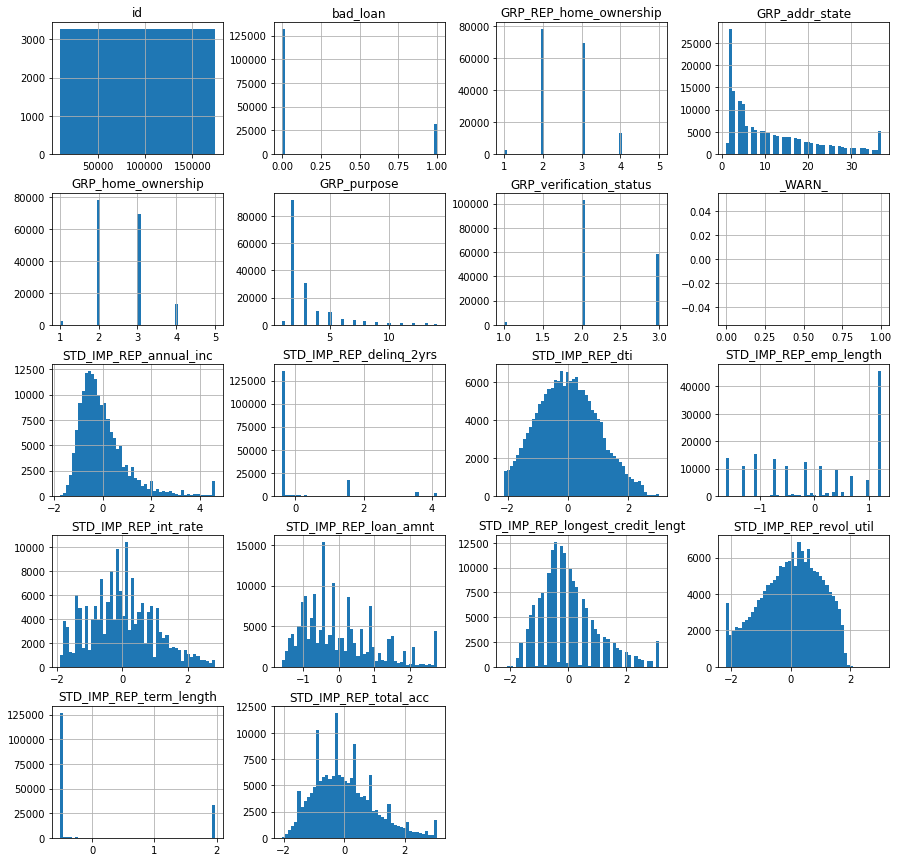

In [9]:
_ = raw[raw.columns].hist(bins=50, figsize=(15, 15)) # display histograms

10. View correlation heatmap

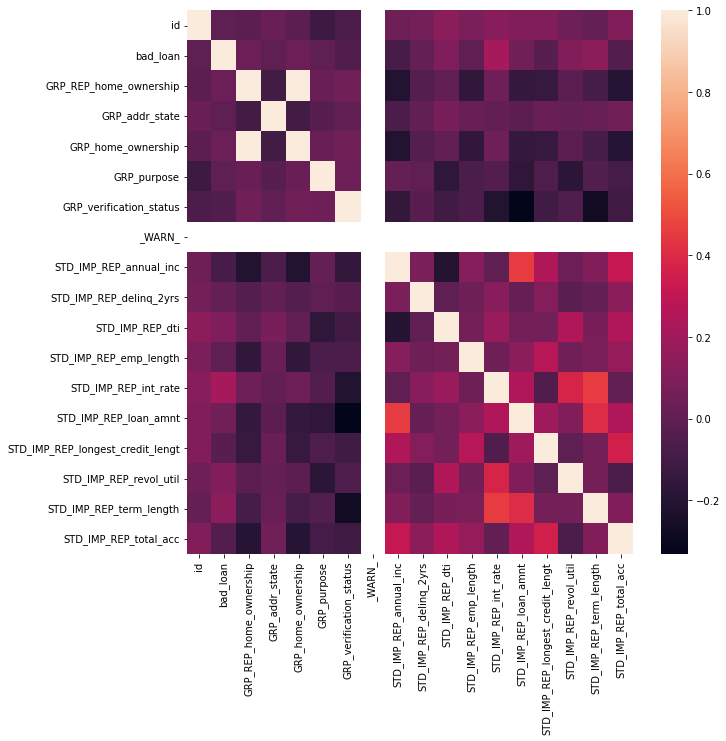

In [10]:
# correlation heatmap
corr = raw.corr()
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

## Train penalized GLM model to predict loan default

11. Assign global constants

In [11]:
x_names = ("GRP_REP_home_ownership", "GRP_addr_state", 
           "GRP_purpose", "GRP_verification_status", 
           "STD_IMP_REP_annual_inc",	"STD_IMP_REP_delinq_2yrs",
           "STD_IMP_REP_dti", "STD_IMP_REP_emp_length", 
           "STD_IMP_REP_int_rate", "STD_IMP_REP_loan_amnt", 
           "STD_IMP_REP_longest_credit_lengt", "STD_IMP_REP_revol_util", 
           "STD_IMP_REP_term_length", "STD_IMP_REP_total_acc")
y_name = "bad_loan" # REQUIRES STUDENT INPUT

12. Start h2o server

In [12]:
# start h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1n7e99vr
  JVM stdout: /tmp/tmp1n7e99vr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1n7e99vr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_0xqz7p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


13. Function for penalized GLM training that selects good alpha and lamda

In [13]:
def glm_grid(x_names, y_name, htrain, hvalid=None, seed_=12345):

    """ Wrapper function for penalized GLM with alpha and lambda search.
    :param x_names: List of inputs.
    :param y_name: Name of target variable.
    :param htrain: Training H2OFrame.
    :param hvalid: Validation H2OFrame, default None.
    :param seed_: Random seed for better reproducibility, default 12345.
    :return: Best H2OGeneralizedLinearEstimator.
    """

    alpha_opts = [0.01, 0.25, 0.5, 0.99]  # REQUIRES STUDENT INPUT

    # define search criteria
    # i.e., over alpha
    # lamda search handled by lambda_search param below
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(family="binomial",
                                      lambda_search=True,
                                      seed=seed_),
        hyper_params=hyper_parameters)

    # execute training w/ grid search
    grid.train(y=y_name,
               x=x_names,
               training_frame=htrain,
               validation_frame=hvalid,
               seed=seed_)

    # select best model from grid search
    best_model = grid.get_grid()[0]
    del grid

    return best_model


14. Convert from Pandas DataFrame to H2OFrame

In [14]:
train = h2o.H2OFrame(raw) # load Pandas DataFrame in H2OFrame
train[y_name] = train[y_name].asfactor() # ensures h2o treats y/target as categorical and not numeric

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


15. Train model using `glm_grid` function

In [15]:
loan_glm = glm_grid(x_names, y_name, train) # REQUIRES STUDENT INPUT

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.7/dist-packages/h2o/grid/grid_search.py:427: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


16. Print learned coefficients

In [16]:
# print trained model parameters
print('Model parameters:')
for name, val in loan_glm.coef().items():
    print(name + ':', val)
print()

Model parameters:
Intercept: -1.6674288949522607
GRP_REP_home_ownership: 0.05141784848056818
GRP_addr_state: -0.0021362779538869722
GRP_purpose: 0.02654487017363923
GRP_verification_status: -0.031662109727201154
STD_IMP_REP_annual_inc: -0.22499358162642524
STD_IMP_REP_delinq_2yrs: 0.017391027679952722
STD_IMP_REP_dti: 0.14304222277838258
STD_IMP_REP_emp_length: -0.00985020949106613
STD_IMP_REP_int_rate: 0.39245459250976994
STD_IMP_REP_loan_amnt: 0.08583408407021786
STD_IMP_REP_longest_credit_lengt: 0.01018959921410591
STD_IMP_REP_revol_util: 0.08782326764993052
STD_IMP_REP_term_length: 0.1278139935407737
STD_IMP_REP_total_acc: -0.10475492968099663



17. View elastic net trace plot

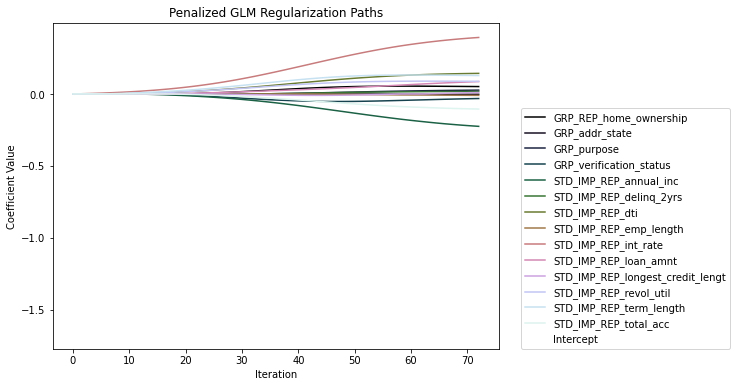

In [17]:
# view trace plot

# collect regularization paths from dict in DataFrame
reg_path_dict = loan_glm.getGLMRegularizationPath(loan_glm)
reg_path_frame = pd.DataFrame(columns=reg_path_dict['coefficients'][0].keys())
for i in range(0, len(reg_path_dict['coefficients'])): 
    reg_path_frame = reg_path_frame.append(reg_path_dict['coefficients'][i], 
                                           ignore_index=True)

glm_selected = list(reg_path_frame.iloc[-1, :][reg_path_frame.iloc[-1, :].abs() > 0.0001].index)

# plot regularization paths
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = reg_path_frame[glm_selected].plot(kind='line', ax=ax_, title='Penalized GLM Regularization Paths',
                                      colormap='cubehelix')
_ = ax_.set_xlabel('Iteration')
_ = ax_.set_ylabel('Coefficient Value')
_ = plt.legend(bbox_to_anchor=(1.05, 0),
               loc=3, 
               borderaxespad=0.)

18. Assign most important feature for evaluation below

In [18]:
# set most important feature 
most_important = 'STD_IMP_REP_int_rate' # REQUIRES STUDENT INPUT

19. Print AUC statistic

In [19]:
# print AUC
print('AUC: %.4f' % loan_glm.auc())

AUC: 0.6789


20. View ten rows of actual vs. predicted

In [21]:
raw['P_bad_loan'] = loan_glm.predict(train)['p1'].as_data_frame() # place prediction into a Pandas Dataframe
raw[[y_name, 'P_bad_loan']].head() # view actual vs. predicted

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,bad_loan,P_bad_loan
0,0,0.228377
1,1,0.245866
2,0,0.278425
3,0,0.171208
4,0,0.131085


21. View actual vs. predicted for most important feature

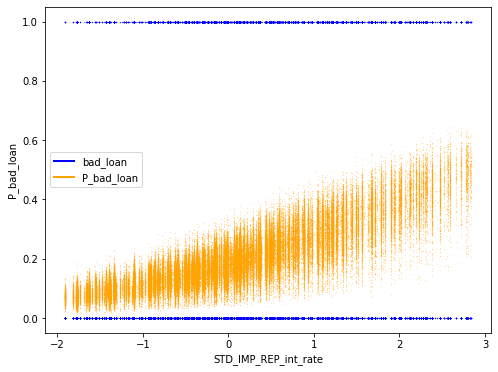

In [22]:
# display y vs. yhat for visual evaluation
fig, ax_ = plt.subplots(figsize=(8, 6))
_ = raw.plot(kind='scatter', x=most_important, y=y_name, s=0.01, color='blue', ax=ax_)
_ = raw.plot(kind='scatter', x=most_important, y='P_bad_loan', s=0.01, color='orange', ax=ax_)

# add custom legend
from matplotlib.lines import Line2D 
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]
_ = ax_.legend(custom_lines, [y_name, 'P_bad_loan'])

22. Generate a prediction for a new customer

In [23]:
# predict on new data -- REQUIRES STUDENT INPUT
new_row = h2o.H2OFrame({
  "GRP_REP_home_ownership": 3,
  "GRP_addr_state": 20,
  "GRP_purpose": 5,
  "GRP_verification_status": 3,
  "STD_IMP_REP_annual_inc": 1,
  "STD_IMP_REP_delinq_2yrs": 5,
  "STD_IMP_REP_dti": 3,
  "STD_IMP_REP_emp_length": -2,
  "STD_IMP_REP_int_rate": 4,
  "STD_IMP_REP_loan_amnt": 3,
  "STD_IMP_REP_longest_credit_lengt": 4,
  "STD_IMP_REP_revol_util": 3,
  "STD_IMP_REP_term_length": 3,
  "STD_IMP_REP_total_acc": -2 
}) 

# generate prediction -- REQUIRES STUDENT INPUT
raw['P_bad_loan1'] = loan_glm.predict(new_row)['p1'].as_data_frame() # place prediction into a Pandas Dataframe
raw[[y_name, 'P_bad_loan1']] # view actual vs. predicted

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,bad_loan,P_bad_loan1
0,0,0.820115
1,1,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
163982,0,NaN
163983,0,NaN
163984,0,NaN
163985,0,NaN


23. Shutdown h2o

In [24]:
# shutdown h2o
h2o.cluster().shutdown()

H2O session _sid_b54f closed.
